# Keras + Tensorflow implementation of handwritten digits recognition

Data from Kaggle Digit Recognition competition  
https://www.kaggle.com/c/digit-recognizer/data

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


## Load data

In [3]:
!pwd

/Users/zubo/Dropbox/projects/kaggle/digit-recognizer


In [4]:
train_file = 'data/train.csv'
test_file = 'data/test.csv'

train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)

In [5]:
train_df.head() # labels and pixels

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test_df.head() # no labels here

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


So each row of the dataset is a sequence of ink intensity for the 784 pixels that represents square image with the size 28x28.

In [7]:
train_labels = train_df.label
train_images = train_df.iloc[:,1:]
test_images = test_df

## Show some digits from the input dataset

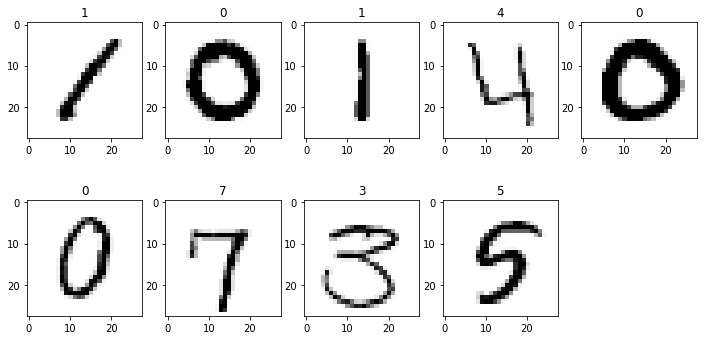

In [8]:
plt.figure(figsize=(12,6))
for i in range(0,9):
    plt.subplot(250 + (i+1))
    img = train_images.ix[i,:].values.reshape(28, 28)
    plt.imshow(img, cmap='Greys')
    plt.title(train_labels[i])

## Preprocess data for NN

In [9]:
train_images = (train_images/train_images.max()).fillna(0) # normalize values
test_images = (test_images/test_images.max()).fillna(0) # normalize values
train_labels = pd.get_dummies(train_labels) # one-hot encoding of the label

In [10]:
train_labels.head()

,0,1,2,3,4,5,6,7,8,9
0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


## Build simple 1-hidden layer dense NN
Some more information about Keras' Sequential models  
https://keras.io/getting-started/sequential-model-guide/

In [11]:
model = Sequential([
    Dense(32, input_dim=784),
    Activation('relu'),
    Dense(10),
    Activation('softmax')
])

# Multi-class classification problem
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 32)            25120       dense_input_1[0][0]              
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 32)            0           dense_1[0][0]                    
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 10)            330         activation_1[0][0]               
____________________________________________________________________________________________________
activation_2 (Activation)        (None, 10)            0           dense_2[0][0]                    
Total params: 25450
_______________________________________________________________________

In [13]:
# import pydot
# from keras.utils.visualize_util import plot
# plot(model, to_file='model.png')

## Train the model

In [14]:
print(train_images.values.shape)
print(train_labels.values.shape)

(42000, 784)
(42000, 10)


Let's fit the weights of our NN. To estimate overfitting, let's use validation dataset which we set up as 5% of the training dataset - validation_split = 0.05.

In [15]:
history=model.fit(train_images.values, train_labels.values, validation_split = 0.05, 
            nb_epoch=25, batch_size=64)

Train on 39900 samples, validate on 2100 samples
Epoch 1/25
39900/39900 [==============================] - 2s - loss: 0.4525 - acc: 0.8794 - val_loss: 0.2920 - val_acc: 0.9214
Epoch 2/25
39900/39900 [==============================] - 2s - loss: 0.2330 - acc: 0.9328 - val_loss: 0.2419 - val_acc: 0.9343
Epoch 3/25
39900/39900 [==============================] - 2s - loss: 0.1889 - acc: 0.9452 - val_loss: 0.2206 - val_acc: 0.9400
Epoch 4/25
39900/39900 [==============================] - 2s - loss: 0.1626 - acc: 0.9526 - val_loss: 0.1972 - val_acc: 0.9457
Epoch 5/25
39900/39900 [==============================] - 2s - loss: 0.1437 - acc: 0.9573 - val_loss: 0.1882 - val_acc: 0.9495
Epoch 6/25
39900/39900 [==============================] - 2s - loss: 0.1297 - acc: 0.9625 - val_loss: 0.1775 - val_acc: 0.9529
Epoch 7/25
39900/39900 [==============================] - 2s - loss: 0.1198 - acc: 0.9650 - val_loss: 0.1717 - val_acc: 0.9567
Epoch 8/25
39900/39900 [==============================] - 2s -

In [16]:
hist_df = pd.DataFrame(history.history)

In [17]:
hist_df.head()

,acc,loss,val_acc,val_loss
0,0.879398,0.452548,0.921429,0.291974
1,0.932782,0.232999,0.934286,0.241881
2,0.945213,0.188870,0.940000,0.220622
3,0.952556,0.162578,0.945714,0.197196
4,0.957268,0.143722,0.949524,0.188219


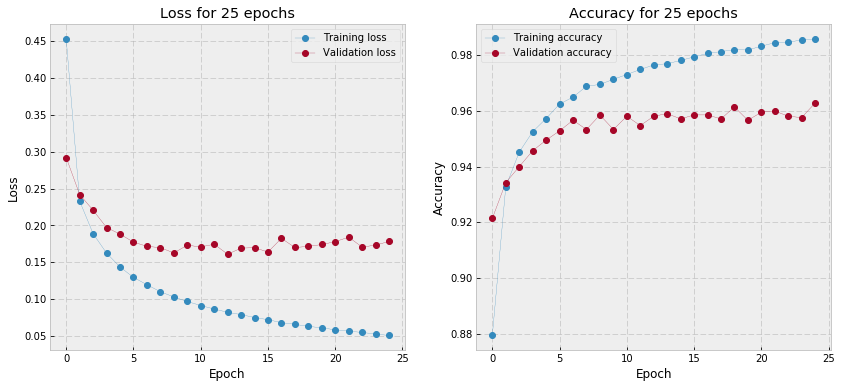

In [18]:
fig = plt.figure(figsize=(14,6))
plt.style.use('bmh')
params_dict = dict(linestyle='solid', linewidth=0.25, marker='o', markersize=6)

plt.subplot(121)
plt.plot(hist_df.loss, label='Training loss', **params_dict)
plt.plot(hist_df.val_loss, label='Validation loss', **params_dict)
plt.title('Loss for ' + str(len(history.epoch)) + ' epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(hist_df.acc, label='Training accuracy', **params_dict)
plt.plot(hist_df.val_acc, label='Validation accuracy', **params_dict)
plt.title('Accuracy for ' + str(len(history.epoch)) + ' epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

Some conclusions here: 
1. At some number of the epochs (8-10 in this case) the validation loss stops decreasing, i.e. the network begin to overfit. The training loss still decreases.
2. The same is true for the training/validation accuracy - validation accuracy stops increasing after some number of epochs.
3. Since validation data was not used for training, measuring accuracy on the the validation dataset gives us an estimation of the ability of the model to generalize.

Basically we tuned the only one parameter - number of epochs using validation.
Now I will use epochs=10.

In [19]:
# Predict on the whole dataset now, 10 epochs
model = Sequential([
    Dense(32, input_dim=784),
    Activation('relu'),
    Dense(10),
    Activation('softmax')
])

# Multi-class classification problem
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images.values, train_labels.values, nb_epoch=10, batch_size=64)

Epoch 1/10
42000/42000 [==============================] - 3s - loss: 0.4534 - acc: 0.8757     
Epoch 2/10
42000/42000 [==============================] - 2s - loss: 0.2473 - acc: 0.9294     
Epoch 3/10
42000/42000 [==============================] - 3s - loss: 0.2030 - acc: 0.9400     
Epoch 4/10
42000/42000 [==============================] - 3s - loss: 0.1744 - acc: 0.9490     
Epoch 5/10
42000/42000 [==============================] - 3s - loss: 0.1537 - acc: 0.9545     
Epoch 6/10
42000/42000 [==============================] - 3s - loss: 0.1385 - acc: 0.9594     
Epoch 7/10
42000/42000 [==============================] - 3s - loss: 0.1266 - acc: 0.9634     
Epoch 8/10
42000/42000 [==============================] - 3s - loss: 0.1168 - acc: 0.9651     
Epoch 9/10
42000/42000 [==============================] - 3s - loss: 0.1076 - acc: 0.9679     
Epoch 10/10
42000/42000 [==============================] - 3s - loss: 0.1008 - acc: 0.9700     


## Predict test labels

In [20]:
pred_classes = model.predict_classes(test_images.values)

27904/28000 [============================>.] - ETA: 0s

In [21]:
pred_classes

array([2, 0, 9, ..., 3, 9, 2])

In [22]:
pred = pd.DataFrame({'ImageId': range(1, len(pred_classes)+1), 'Label': pred_classes})

In [23]:
pred.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [24]:
pred.tail()

,ImageId,Label
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
27999,28000,2


In [26]:
pred.to_csv('data/output/subm06.csv', index=False)